# Capstone: Predicting Airbnb Prices - Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data  = pd.read_csv(R'/Users/martahuhoja/Documents/IOD/Capstone/Airbnb/airbnb_data.csv')

In [3]:
data.shape

(4544, 56)

In [4]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'

In [5]:
#dropping columns that won't be used

data = data.drop(columns=[
                        'listing_url', 'scrape_id', 'last_scraped', 'name', 'host_id',
                        'host_url', 'host_name', 'host_since', 'host_location', 
                        'host_verifications', 'neighbourhood', 'latitude', 'longitude',
                        'property_type', 'first_review', 'last_review', 'region_id',
                        'region_parent_id', 'region_parent_name', 'price', 'amenities_clean'])

In [6]:
data.shape

(4544, 35)

In [7]:
data.dtypes

id                               int64
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost                int64
host_listings_count              int64
host_has_profile_pic             int64
host_identity_verified           int64
room_type                       object
accommodates                     int64
bathrooms_text                 float64
bedrooms                       float64
beds                           float64
amenities                       object
minimum_nights                   int64
maximum_nights                   int64
has_availability                 int64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
number_of_reviews                int64
number_of_reviews_ltm            int64
number_of_reviews_l30d           int64
review_scores_rating           float64
review_scores_accuracy   

/var/folders/xk/hxj8h6056qx_kw4p64k25rzr0000gn/T/ipykernel_94035/3984525858.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
/var/folders/xk/hxj8h6056qx_kw4p64k25rzr0000gn/T/ipykernel_94035/3984525858.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


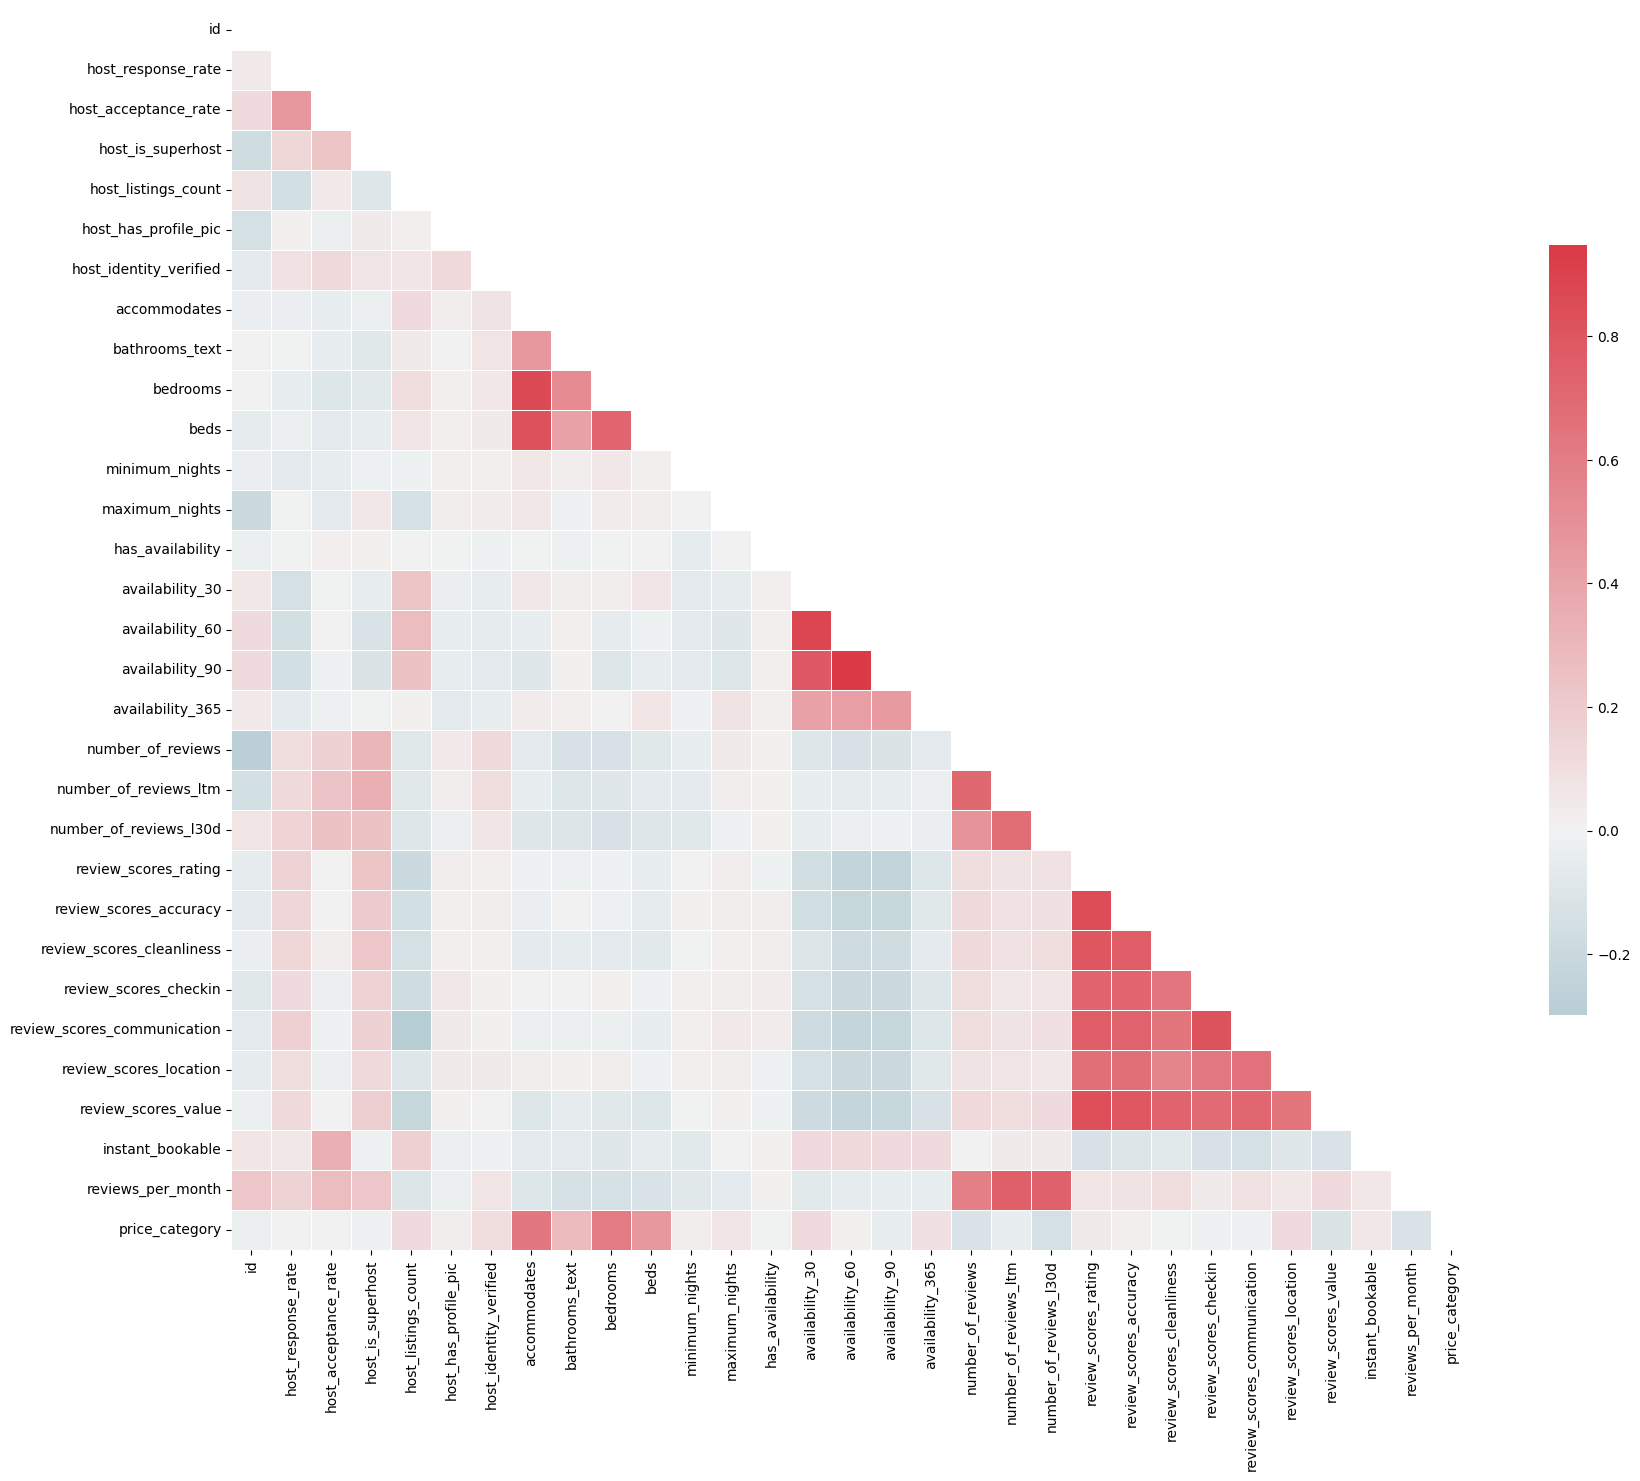

In [8]:
figsize=(20,20)

corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=figsize)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());


## Create dummies for room type, host response time and region

In [9]:
data = pd.get_dummies(data, columns=['host_response_time', 'room_type'], prefix=['response', 'room'])
data=data.drop(columns=['room_Shared room', 'response_a few days or more'])

In [10]:
data = pd.get_dummies(data, columns=['region_name'], prefix=['region'], drop_first=True)

## Create dummies for amenities

Dummy variables created for amenities column. Code is implemented from https://github.com/alisonglazer/metis_project_5_airbnb_pricing/blob/master/p05_Data_Clean_Feature_Setup.ipynb.

In [11]:
import re
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.tokenize import sent_tokenize
import spacy
nlp = spacy.load('en_core_web_md')
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter

In [12]:
data.amenities = data.amenities.apply(lambda x: re.sub('[^a-zA-Z,\/\s\d-]*', '', x).split(sep=','))
amenities_list = [item for sublist in data.amenities for item in sublist]
amenity_counts = Counter(amenities_list).most_common()

In [13]:
amenity_counts[0:50]

[(' Smoke alarm', 4261),
 (' Essentials', 4019),
 (' Wifi', 3991),
 (' Long term stays allowed', 3694),
 (' Hangers', 3684),
 (' Kitchen', 3666),
 (' Hot water', 3611),
 (' Hair dryer', 3554),
 (' Dishes and silverware', 3521),
 (' Iron', 3463),
 (' Microwave', 3158),
 (' Bed linens', 3149),
 (' Refrigerator', 3080),
 (' Cooking basics', 2961),
 (' Free parking on premises', 2885),
 (' Shampoo', 2792),
 (' Washer', 2406),
 (' TV', 2379),
 (' Fire extinguisher', 2355),
 (' Private entrance', 2353),
 (' Extra pillows and blankets', 2219),
 (' Self check-in', 2138),
 (' First aid kit', 2076),
 (' Dishwasher', 2036),
 (' Free street parking', 2017),
 (' Oven', 1991),
 (' Toaster', 1927),
 (' Hot water kettle', 1923),
 (' Stove', 1877),
 (' Wine glasses', 1765),
 (' Shower gel', 1681),
 (' Cleaning products', 1599),
 (' Dining table', 1592),
 ('Heating', 1558),
 (' Lockbox', 1541),
 (' Dedicated workspace', 1536),
 (' Dryer', 1470),
 (' Luggage dropoff allowed', 1452),
 (' Outdoor furniture

In [14]:
amenities_of_interest = [x[0] for x in amenity_counts[0:50]]

In [15]:
data["amenities"] = data.amenities.map(lambda amns: [amenity.strip() for amenity in amns])
amenities_cols = []
amenities_col_names = []
for amenity in amenities_of_interest:
    amenities_cols.append([1 if amenity in x else 0 for x in data["amenities"]])
    amenities_col_names.append(('amen_'+amenity))

In [16]:
amenity_columns = pd.DataFrame(amenities_cols).transpose()
amenity_columns.columns=amenities_col_names
amenity_columns.index=data.index

In [17]:
kitchen_amenities = [ 'Kitchen', 'Dishes and silverware', 'Microwave', 'Refrigerator','Cooking basics', 
                     'Dishwasher', 'Oven','Hot water kettle', 'Toaster', 'Stove', 'Wine glasses', 
                     'Dining table', 'Freezer', 'BBQ grill', 'Coffee', 'Coffee maker']

personal_amenities = ['Shampoo', 'Hair dryer', 'Washer', 'Shower gel', 'Dryer', 'Body soap' ]

safety_amenities = ['Smoke alarm', 'Fire extinguisher', 'First aid kit']

household_amenities = ['Essentials', 'Long term stays allowed', 'Hangers', 'Hot water', 
                       'Free parking on premises',  'Private entrance',  'Self check-in', 
                       'Free street parking', 'Cleaning products', 'Lockbox', 'Luggage dropoff allowed', 
                       'Heating', 'Air conditioning', 'Single level home']
    
bedroom_amenities = ['Hangers', 'Extra pillows and blankets']

electronics_amenities = ['Wifi', 'TV']

extra_spaces_amenities = ['Private patio or balcony', 'Dedicated workspace', 
                          'Outdoor furniture', 'Outdoor dining area', 'Backyard',]

amenity_groups = [
    kitchen_amenities, personal_amenities, safety_amenities,
    household_amenities, bedroom_amenities, electronics_amenities,
    extra_spaces_amenities
]

In [18]:
amenity_group_cols = []
for group in amenity_groups:
    amenity_group_cols.append(data.amenities.apply(
    lambda x: len(set(group).intersection(set(x)))))

In [19]:
amenity_group_columns = pd.DataFrame(amenity_group_cols).transpose()
amenity_group_columns.index = data.index
amenity_group_columns.columns = [
    'amen_group_kitchen', 'amen_group_personal', 'amen_group_safety',
    'amen_group_household', 'amen_group_bedroom', 'amen_group_electronics',
    'amen_group_extra_spaces'
]

In [20]:
data = data.merge(amenity_group_columns,how='left',left_index=True,right_index=True)

In [21]:
data

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,...,region_Waitākere Ward,region_Whau Ward,region_Ōrākei Ward,amen_group_kitchen,amen_group_personal,amen_group_safety,amen_group_household,amen_group_bedroom,amen_group_electronics,amen_group_extra_spaces
0,119431,90.0,83.0,0,1,1,1,8,1.0,3.0,...,0,0,0,15,3,3,11,1,1,3
1,154119,100.0,75.0,0,1,1,0,2,1.0,1.0,...,1,0,0,6,2,1,8,1,2,0
2,154130,100.0,95.0,1,1,1,1,4,1.0,2.0,...,1,0,0,3,4,3,8,2,2,0
3,216802,100.0,85.0,0,4,1,1,2,1.0,1.0,...,0,0,0,1,2,0,7,1,2,1
4,216846,100.0,85.0,0,4,1,1,1,1.0,1.0,...,0,0,0,2,2,0,6,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,750799279512337008,100.0,96.0,0,86,1,1,3,1.0,1.0,...,0,0,0,8,1,3,7,2,2,1
4540,750986727197116700,100.0,100.0,0,1,1,1,2,1.0,1.0,...,0,0,0,2,1,3,3,0,2,2
4541,751579355490586247,100.0,100.0,0,1,1,1,4,1.0,1.0,...,0,0,0,1,1,1,6,0,2,1
4542,752432468822072687,100.0,100.0,0,1,1,0,4,2.0,1.0,...,0,0,0,2,1,1,3,0,2,2


In [22]:
data.dtypes

id                                      int64
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                       int64
host_listings_count                     int64
host_has_profile_pic                    int64
host_identity_verified                  int64
accommodates                            int64
bathrooms_text                        float64
bedrooms                              float64
beds                                  float64
amenities                              object
minimum_nights                          int64
maximum_nights                          int64
has_availability                        int64
availability_30                         int64
availability_60                         int64
availability_90                         int64
availability_365                        int64
number_of_reviews                       int64
number_of_reviews_ltm                   int64
number_of_reviews_l30d            

## Heatmap with all the dummies 

/var/folders/xk/hxj8h6056qx_kw4p64k25rzr0000gn/T/ipykernel_94035/3984525858.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
/var/folders/xk/hxj8h6056qx_kw4p64k25rzr0000gn/T/ipykernel_94035/3984525858.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


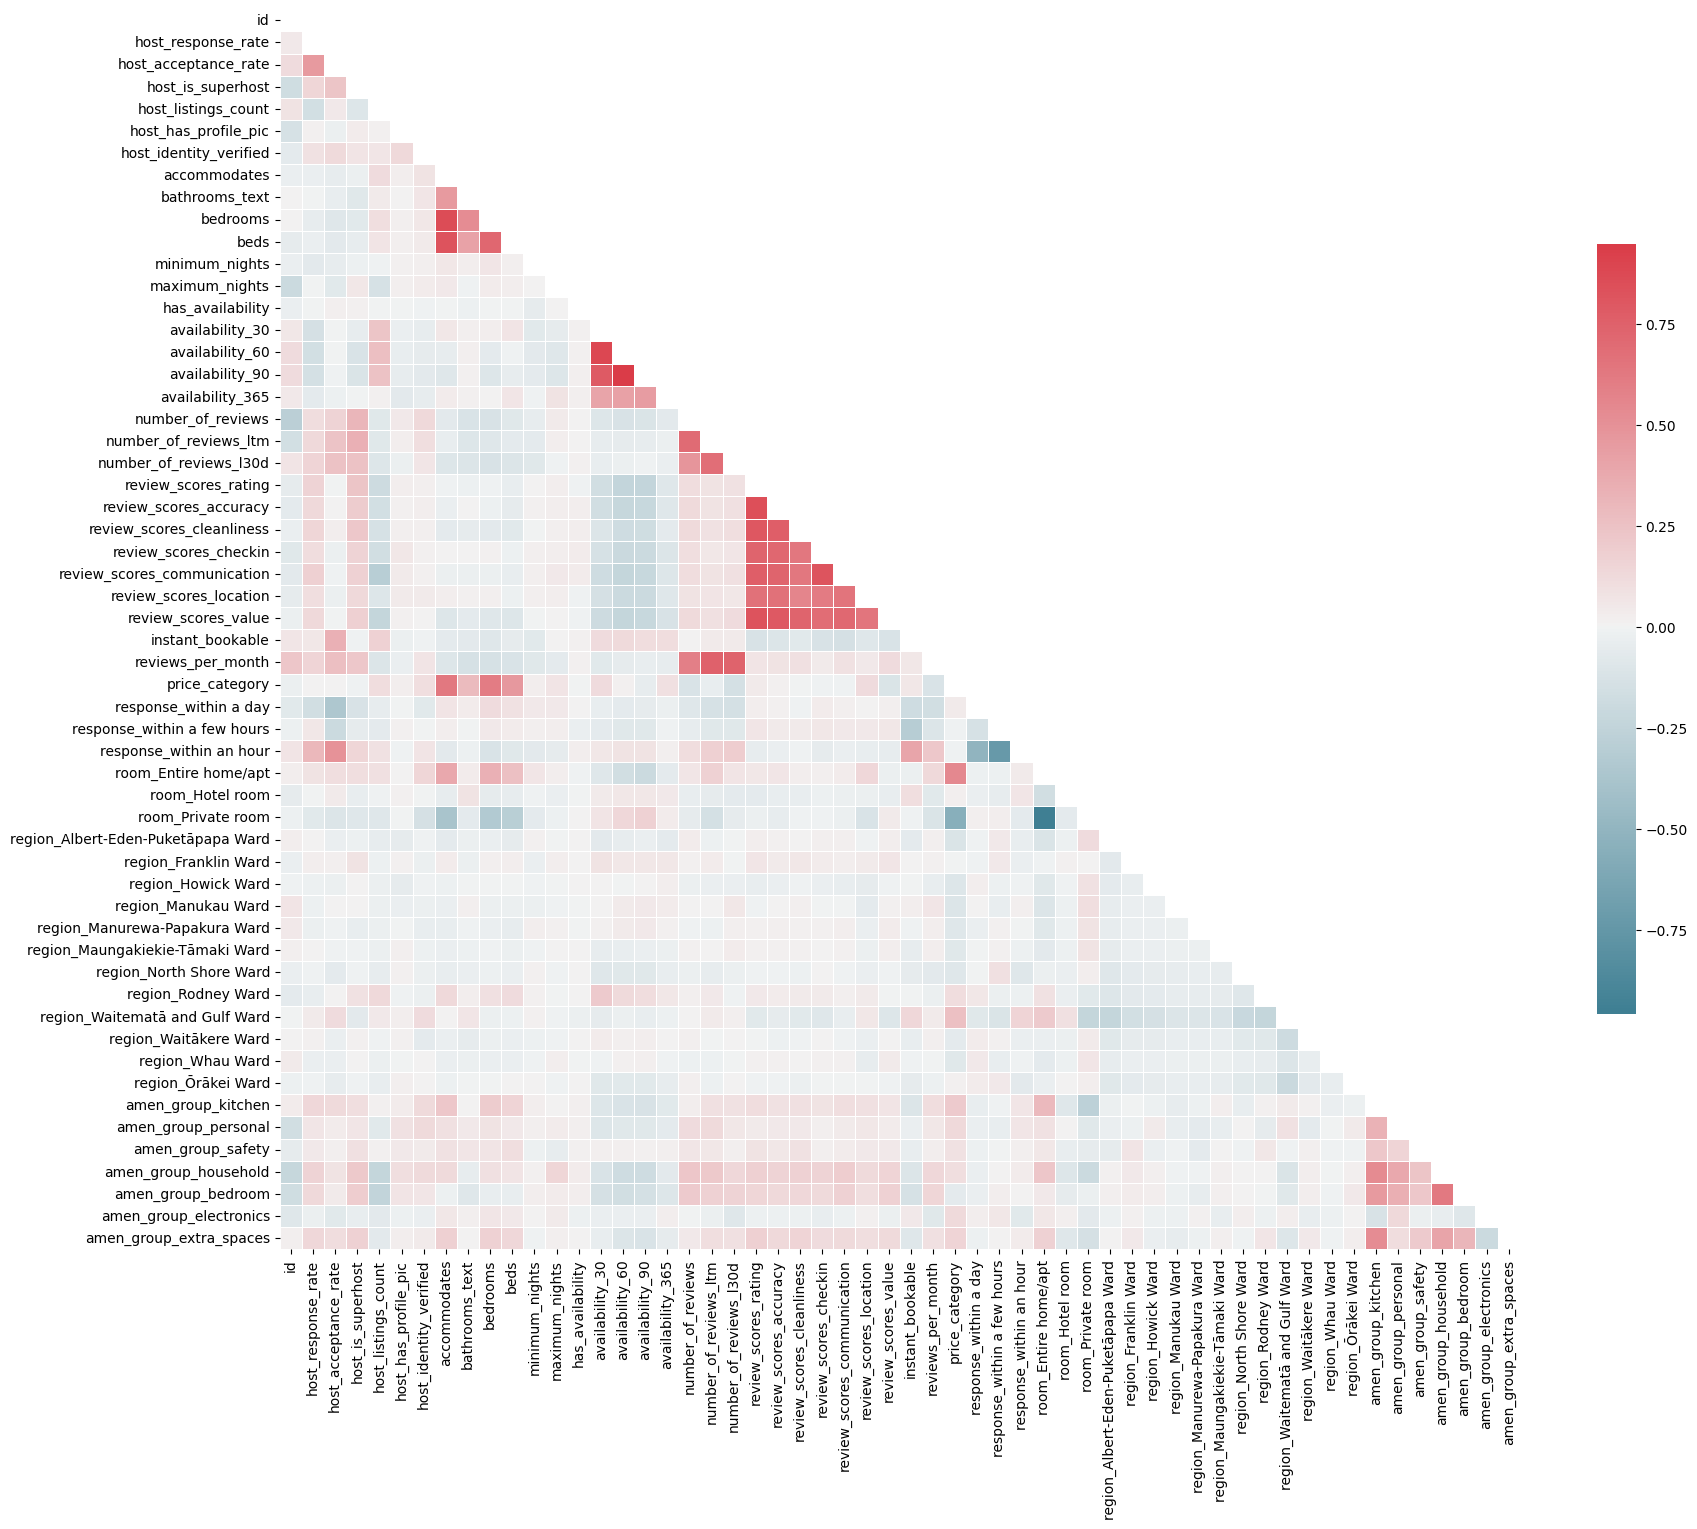

In [23]:
figsize=(20,20)

corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=figsize)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());


In [25]:
corr_price_category = corr['price_category'].sort_values(ascending=False)

print(corr_price_category)

price_category                        1.000000
accommodates                          0.631596
bedrooms                              0.611463
room_Entire home/apt                  0.552514
beds                                  0.464827
bathrooms_text                        0.289722
region_Waitematā and Gulf Ward        0.256917
amen_group_kitchen                    0.210700
amen_group_extra_spaces               0.155068
amen_group_personal                   0.134934
amen_group_electronics                0.123890
review_scores_location                0.117781
availability_30                       0.115350
host_listings_count                   0.113137
region_Rodney Ward                    0.112106
host_identity_verified                0.103664
amen_group_household                  0.100400
availability_365                      0.092534
amen_group_safety                     0.090070
maximum_nights                        0.076498
instant_bookable                      0.056314
review_scores

In [26]:
data = data.drop(columns=['amenities', 'host_response_rate', 'host_acceptance_rate', 'region_Franklin Ward', 'has_availability', 'review_scores_cleanliness', 'response_within an hour', 'response_within a few hours'])

In [29]:
data.shape

(4544, 49)

In [27]:
data.to_csv('data_final.csv', index=False)